In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# import dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
# read in csv
# set index to 'Date'
# set 'Date' to datetime
df = pd.read_csv('resources/S&P 500 Index Data 1927 - 2020.csv',
                index_col= 'Date',
                parse_dates= True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [4]:
# keep only the 'Close' column
# use .info() to explore dataframe
# drop any nulls
sp500_df = df[['Close']].dropna()
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23323 entries, 1927-12-30 to 2020-11-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   23323 non-null  float64
dtypes: float64(1)
memory usage: 364.4 KB


<Axes: xlabel='Date'>

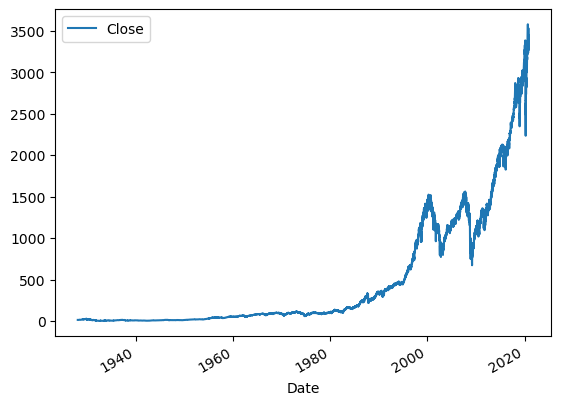

In [5]:
sp500_df.plot()

In [6]:
# drop columns 'Open', 'High', 'Low', 'Volume'
sp500_df = df.drop(columns= ['Open', 'High', 'Low', 'Volume', 'Adj Close']).dropna()
sp500_df.head()

,Close
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000


In [7]:
# take the average of the 'Close' column by month
monthly_average = sp500_df.groupby(sp500_df.index.to_period('M')).mean()
monthly_average.head()

,Close
Date,
1927-12,17.660000
1928-01,17.520000
1928-02,17.324211
1928-03,18.233182
1928-04,19.371000


In [8]:
# change the index to a datetime
monthly_average.index = monthly_average.index.to_timestamp()
monthly_average.head()

,Close
Date,
1927-12-01,17.660000
1928-01-01,17.520000
1928-02-01,17.324211
1928-03-01,18.233182
1928-04-01,19.371000


In [9]:
# Reset the index so that we recode the columns for Prophet
monthly_average = monthly_average.reset_index()

In [10]:
# Label the columns ds and y so that the syntax is recognized by Prophet
monthly_average = monthly_average.rename(columns= {'Date': 'ds', 'Close': 'y'})

In [11]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(monthly_average.shape)
display(monthly_average.head())
display(monthly_average.tail())

(1116, 2)

,ds,y
0,1927-12-01,17.660000
1,1928-01-01,17.520000
2,1928-02-01,17.324211
3,1928-03-01,18.233182
4,1928-04-01,19.371000


,ds,y
1111,2020-07-01,3207.619096
1112,2020-08-01,3391.710019
1113,2020-09-01,3365.516671
1114,2020-10-01,3418.699996
1115,2020-11-01,3374.279948


In [12]:
# Sort the DataFrame by `ds` in ascending order
monthly_average = monthly_average.sort_values(by=["ds"], ascending=True)

# Display sample data from head and tail
display(monthly_average.head(10))
display(monthly_average.tail(10))

,ds,y
0,1927-12-01,17.660000
1,1928-01-01,17.520000
2,1928-02-01,17.324211
3,1928-03-01,18.233182
4,1928-04-01,19.371000
5,1928-05-01,20.004091
6,1928-06-01,18.985238
7,1928-07-01,19.155714
8,1928-08-01,19.793478
9,1928-09-01,21.173158


,ds,y
1106,2020-02-01,3277.314183
1107,2020-03-01,2652.393632
1108,2020-04-01,2761.975226
1109,2020-05-01,2919.608484
1110,2020-06-01,3104.660933
1111,2020-07-01,3207.619096
1112,2020-08-01,3391.710019
1113,2020-09-01,3365.516671
1114,2020-10-01,3418.699996
1115,2020-11-01,3374.279948


In [13]:
#911 DATA

In [14]:
# reduce the dataset to only the period from January 1988 to August 2001
monthly_average_911_forecast = monthly_average.loc[(monthly_average["ds"] >= "1988-01") & (monthly_average["ds"] <= "2001-08")]
display(monthly_average_911_forecast.head(10))
display(monthly_average_911_forecast.tail(10))

,ds,y
721,1988-01-01,250.476503
722,1988-02-01,258.127999
723,1988-03-01,265.737392
724,1988-04-01,262.615498
725,1988-05-01,256.123811
726,1988-06-01,270.682728
727,1988-07-01,269.049498
728,1988-08-01,263.726519
729,1988-09-01,267.970001
730,1988-10-01,277.395716


,ds,y
875,2000-11-01,1375.037603
876,2000-12-01,1330.929498
877,2001-01-01,1335.639056
878,2001-02-01,1305.751580
879,2001-03-01,1185.850009
880,2001-04-01,1189.837000
881,2001-05-01,1270.368636
882,2001-06-01,1238.710467
883,2001-07-01,1204.449521
884,2001-08-01,1178.503928


<Axes: xlabel='ds'>

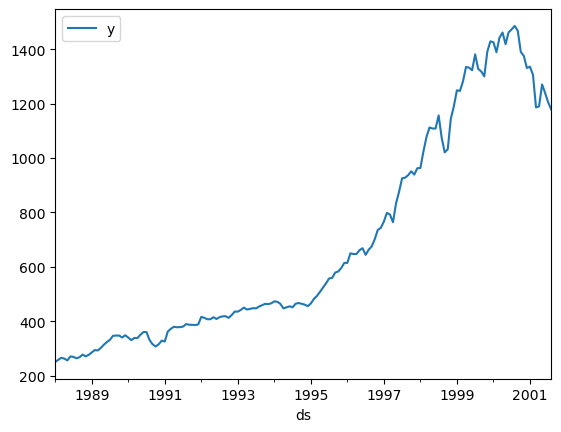

In [15]:
# plot the data
monthly_average_911_forecast.plot(x = 'ds', y = 'y')

In [16]:
# Call the Prophet function, store as an object
model_911_SP = Prophet()
model_911_SP

In [17]:
# Fit the Prophet model.
model_911_SP.fit(monthly_average_911_forecast)

14:48:17 - cmdstanpy - INFO - Chain [1] start processing
14:48:17 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_911_SP = model_911_SP.make_future_dataframe(periods=36, freq='M')

# View the last five rows of the predictions
future_911_SP.tail()

c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
195,2004-03-31
196,2004-04-30
197,2004-05-31
198,2004-06-30
199,2004-07-31


In [19]:
# Make the predictions for the trend data using the future_trends DataFrame
future_911_SP = model_911_SP.predict(future_911_SP)

# Display the first five rows of the forecast DataFrame
future_911_SP.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1988-01-01,261.219320,187.127339,358.510997,261.219320,261.219320,9.566047,9.566047,9.566047,9.566047,9.566047,9.566047,0.0,0.0,0.0,270.785367
1,1988-02-01,264.042941,187.122954,356.998077,264.042941,264.042941,5.946208,5.946208,5.946208,5.946208,5.946208,5.946208,0.0,0.0,0.0,269.989149
2,1988-03-01,266.684393,201.270871,365.933615,266.684393,266.684393,15.209102,15.209102,15.209102,15.209102,15.209102,15.209102,0.0,0.0,0.0,281.893495
3,1988-04-01,269.508014,186.999229,363.443047,269.508014,269.508014,-1.218631,-1.218631,-1.218631,-1.218631,-1.218631,-1.218631,0.0,0.0,0.0,268.289383
4,1988-05-01,272.240551,180.166416,356.199461,272.240551,272.240551,-1.857840,-1.857840,-1.857840,-1.857840,-1.857840,-1.857840,0.0,0.0,0.0,270.382710


c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


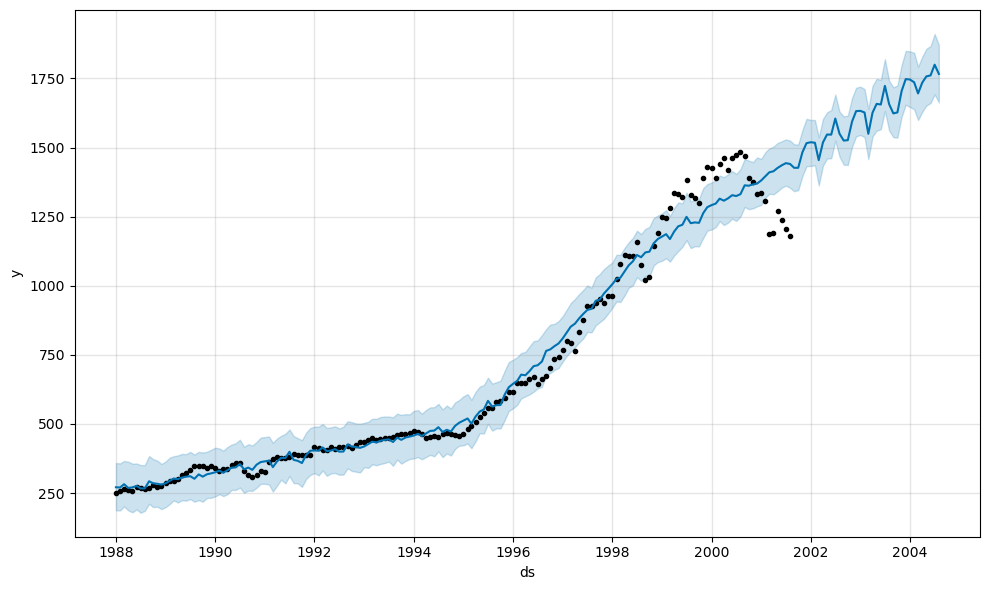

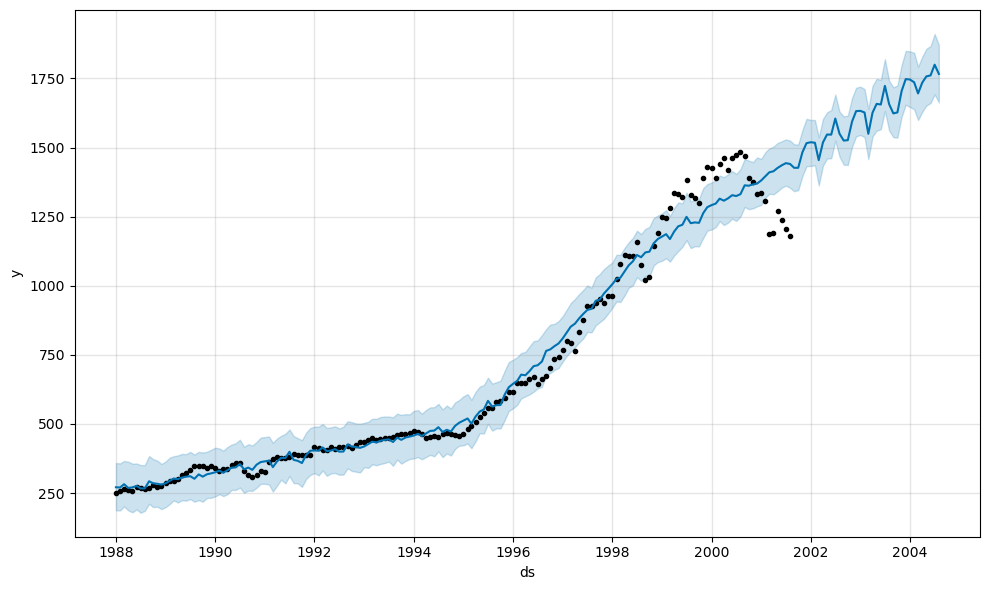

In [20]:
# Plot the Prophet predictions for the Mercado trends data
model_911_SP.plot(future_911_SP)

c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

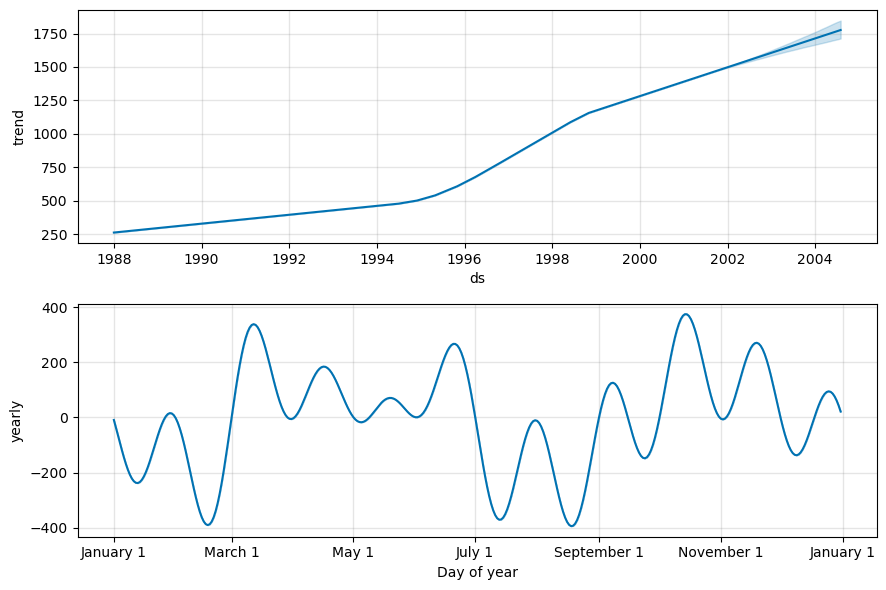

In [21]:
# Use the plot_components function to visualize the forecast results 
figures_911_SP = model_911_SP.plot_components(future_911_SP)

In [22]:
# At this point, it's useful to set the `datetime` index of the forecast data.
future_911_SP = future_911_SP.set_index(["ds"])
future_911_SP.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1988-01-01,261.219320,187.127339,358.510997,261.219320,261.219320,9.566047,9.566047,9.566047,9.566047,9.566047,9.566047,0.0,0.0,0.0,270.785367
1988-02-01,264.042941,187.122954,356.998077,264.042941,264.042941,5.946208,5.946208,5.946208,5.946208,5.946208,5.946208,0.0,0.0,0.0,269.989149
1988-03-01,266.684393,201.270871,365.933615,266.684393,266.684393,15.209102,15.209102,15.209102,15.209102,15.209102,15.209102,0.0,0.0,0.0,281.893495
1988-04-01,269.508014,186.999229,363.443047,269.508014,269.508014,-1.218631,-1.218631,-1.218631,-1.218631,-1.218631,-1.218631,0.0,0.0,0.0,268.289383
1988-05-01,272.240551,180.166416,356.199461,272.240551,272.240551,-1.857840,-1.857840,-1.857840,-1.857840,-1.857840,-1.857840,0.0,0.0,0.0,270.382710


In [23]:
# reduce the dataset to only the period from January 1988 to July 2004
monthly_average_911_actual = monthly_average.loc[(monthly_average["ds"] >= "1988-01") & (monthly_average["ds"] <= "2004-07")]
display(monthly_average_911_actual.head(10))
display(monthly_average_911_actual.tail(10))

,ds,y
721,1988-01-01,250.476503
722,1988-02-01,258.127999
723,1988-03-01,265.737392
724,1988-04-01,262.615498
725,1988-05-01,256.123811
726,1988-06-01,270.682728
727,1988-07-01,269.049498
728,1988-08-01,263.726519
729,1988-09-01,267.970001
730,1988-10-01,277.395716


,ds,y
910,2003-10-01,1038.734343
911,2003-11-01,1049.898945
912,2003-12-01,1080.635920
913,2004-01-01,1132.517499
914,2004-02-01,1143.356323
915,2004-03-01,1123.978245
916,2004-04-01,1133.078573
917,2004-05-01,1102.781500
918,2004-06-01,1132.757156
919,2004-07-01,1105.846656


<Axes: xlabel='ds'>

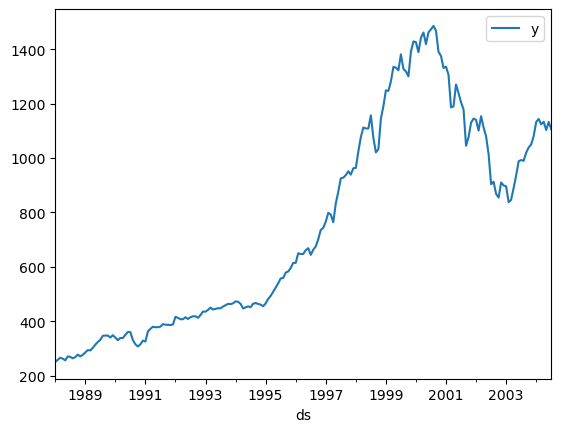

In [24]:
# Plot the data
monthly_average_911_actual.plot(x = 'ds', y = 'y')

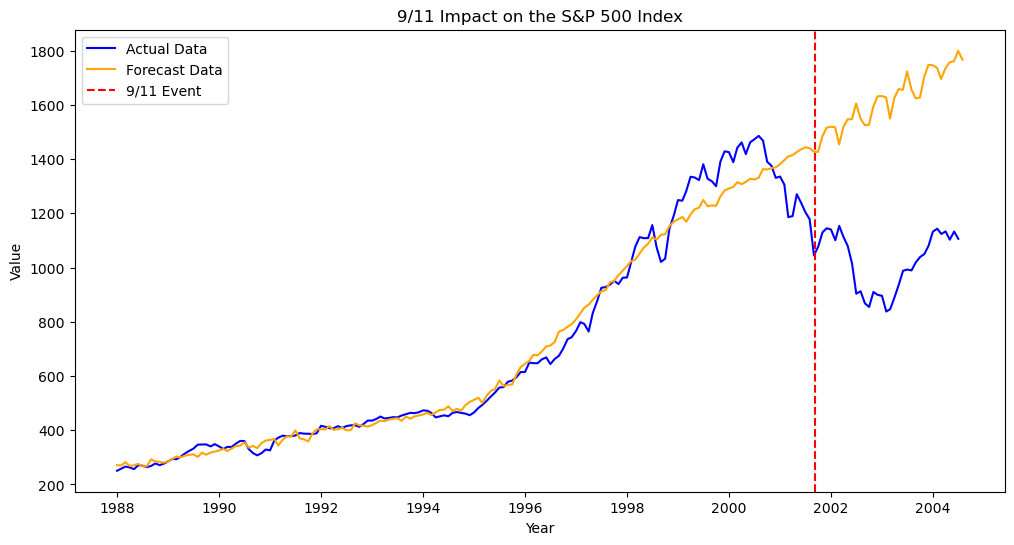

In [25]:
# Assuming 'actual_data' and 'forecast_data' are your DataFrames
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(monthly_average_911_actual['ds'],monthly_average_911_actual['y'], label='Actual Data', color='blue')

# Plot forecast data
plt.plot(future_911_SP.index,future_911_SP['yhat'], label='Forecast Data', color='orange')

# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11 Event')

# Add titles and labels
plt.title('9/11 Impact on the S&P 500 Index')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [26]:
# Location matters!

In [27]:
#Katrina DATA

In [28]:
# reduce the dataset to only the period from January 1988 to August 2005
monthly_average_katrina_forecast = monthly_average.loc[(monthly_average["ds"] >= "1988-01") & (monthly_average["ds"] <= "2005-08")]
display(monthly_average_katrina_forecast.head(10))
display(monthly_average_katrina_forecast.tail(10))

,ds,y
721,1988-01-01,250.476503
722,1988-02-01,258.127999
723,1988-03-01,265.737392
724,1988-04-01,262.615498
725,1988-05-01,256.123811
726,1988-06-01,270.682728
727,1988-07-01,269.049498
728,1988-08-01,263.726519
729,1988-09-01,267.970001
730,1988-10-01,277.395716


,ds,y
923,2004-11-01,1168.937622
924,2004-12-01,1199.209545
925,2005-01-01,1181.407996
926,2005-02-01,1199.626844
927,2005-03-01,1194.897727
928,2005-04-01,1164.427612
929,2005-05-01,1178.275716
930,2005-06-01,1202.253168
931,2005-07-01,1222.236999
932,2005-08-01,1224.269998


<Axes: xlabel='ds'>

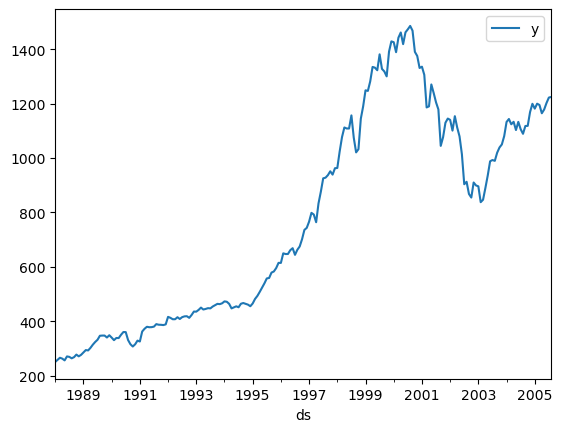

In [29]:
# plot the data
monthly_average_katrina_forecast.plot(x = 'ds', y = 'y')

In [30]:
# Call the Prophet function, store as an object
model_katrina_SP = Prophet()
model_katrina_SP


In [31]:
# Fit the Prophet model.
model_katrina_SP.fit(monthly_average_katrina_forecast)

14:48:22 - cmdstanpy - INFO - Chain [1] start processing
14:48:22 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 3 years
future_katrina_SP = model_katrina_SP.make_future_dataframe(periods=36, freq='M')
# View the last five rows of the predictions
future_katrina_SP.tail()

c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
243,2008-03-31
244,2008-04-30
245,2008-05-31
246,2008-06-30
247,2008-07-31


In [33]:
# Make the predictions for the trend data using the future_trends DataFrame
future_katrina_SP = model_katrina_SP.predict(future_katrina_SP)
# Display the first five rows of the forecast DataFrame
future_katrina_SP.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1988-01-01,243.150206,124.201925,382.182438,243.150206,243.150206,9.072750,9.072750,9.072750,9.072750,9.072750,9.072750,0.0,0.0,0.0,252.222956
1,1988-02-01,246.452820,138.491803,373.382006,246.452820,246.452820,9.218722,9.218722,9.218722,9.218722,9.218722,9.218722,0.0,0.0,0.0,255.671542
2,1988-03-01,249.542363,141.452256,387.379843,249.542363,249.542363,17.218226,17.218226,17.218226,17.218226,17.218226,17.218226,0.0,0.0,0.0,266.760589
3,1988-04-01,252.844977,131.582877,383.925241,252.844977,252.844977,4.246555,4.246555,4.246555,4.246555,4.246555,4.246555,0.0,0.0,0.0,257.091532
4,1988-05-01,256.041055,133.297499,390.657692,256.041055,256.041055,-0.331334,-0.331334,-0.331334,-0.331334,-0.331334,-0.331334,0.0,0.0,0.0,255.709722


c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


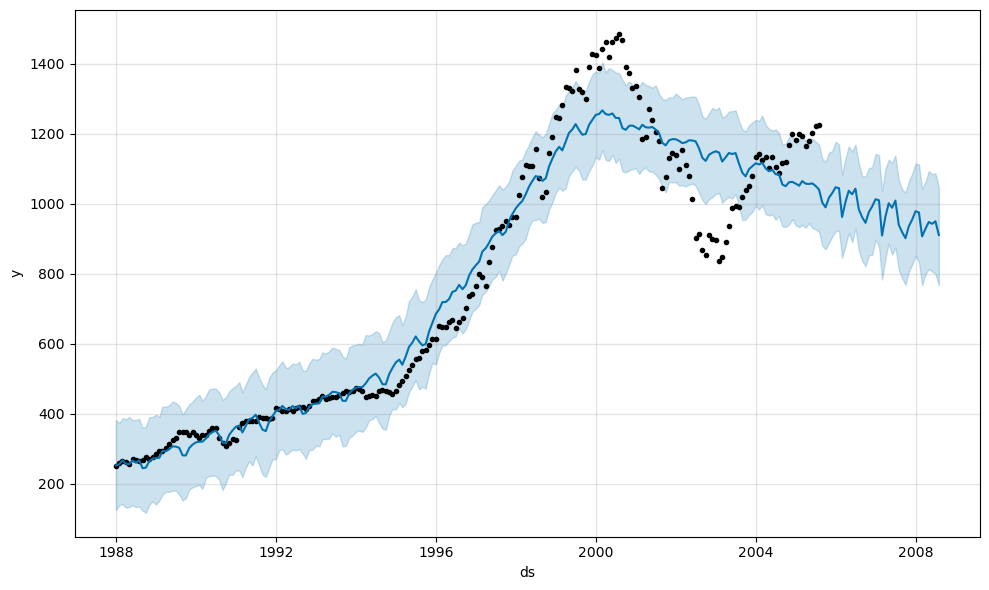

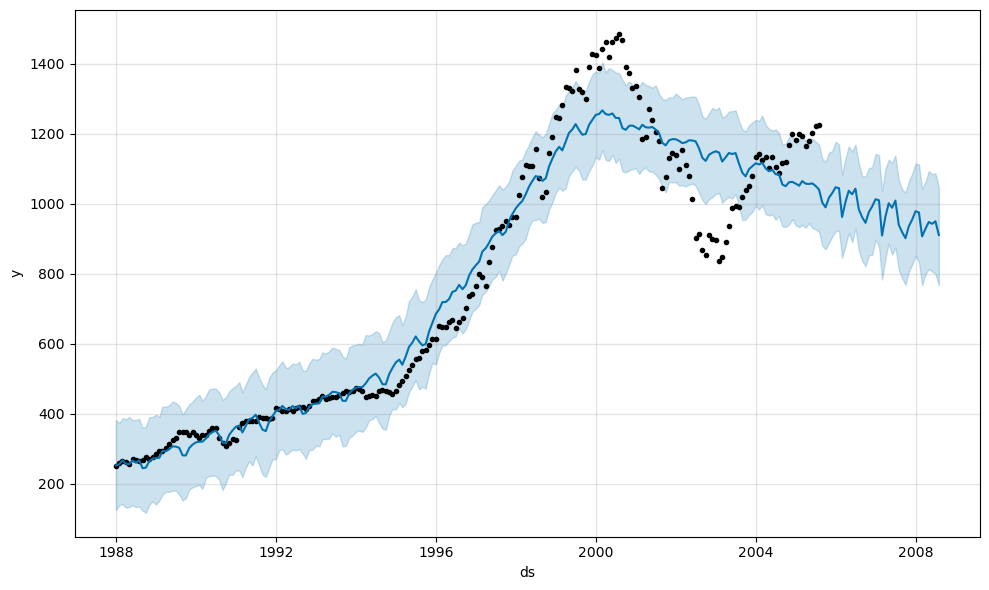

In [34]:
# Plot the Prophet predictions for the Mercado trends data
model_katrina_SP.plot(future_katrina_SP)

c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\linan\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

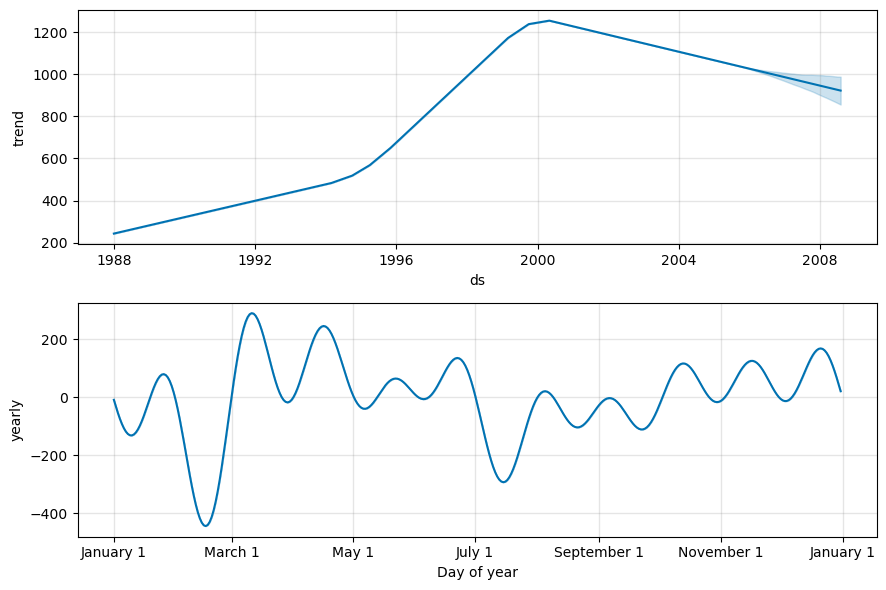

In [35]:
# Use the plot_components function to visualize the forecast results 
figures_katrina_SP = model_katrina_SP.plot_components(future_katrina_SP)

In [36]:
# At this point, it's useful to set the `datetime` index of the forecast data.
future_katrina_SP = future_katrina_SP.set_index(["ds"])
future_katrina_SP.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1988-01-01,243.150206,124.201925,382.182438,243.150206,243.150206,9.072750,9.072750,9.072750,9.072750,9.072750,9.072750,0.0,0.0,0.0,252.222956
1988-02-01,246.452820,138.491803,373.382006,246.452820,246.452820,9.218722,9.218722,9.218722,9.218722,9.218722,9.218722,0.0,0.0,0.0,255.671542
1988-03-01,249.542363,141.452256,387.379843,249.542363,249.542363,17.218226,17.218226,17.218226,17.218226,17.218226,17.218226,0.0,0.0,0.0,266.760589
1988-04-01,252.844977,131.582877,383.925241,252.844977,252.844977,4.246555,4.246555,4.246555,4.246555,4.246555,4.246555,0.0,0.0,0.0,257.091532
1988-05-01,256.041055,133.297499,390.657692,256.041055,256.041055,-0.331334,-0.331334,-0.331334,-0.331334,-0.331334,-0.331334,0.0,0.0,0.0,255.709722


In [37]:
# reduce the dataset to only the period from January 1988 to July 2008
monthly_average_katrina_actual = monthly_average.loc[(monthly_average["ds"] >= "1988-01") & (monthly_average["ds"] <= "2008-07")]
display(monthly_average_katrina_actual.head(10))
display(monthly_average_katrina_actual.tail(10))


,ds,y
721,1988-01-01,250.476503
722,1988-02-01,258.127999
723,1988-03-01,265.737392
724,1988-04-01,262.615498
725,1988-05-01,256.123811
726,1988-06-01,270.682728
727,1988-07-01,269.049498
728,1988-08-01,263.726519
729,1988-09-01,267.970001
730,1988-10-01,277.395716


,ds,y
958,2007-10-01,1539.658691
959,2007-11-01,1463.385237
960,2007-12-01,1479.223498
961,2008-01-01,1378.763806
962,2008-02-01,1354.872510
963,2008-03-01,1316.942993
964,2008-04-01,1370.469094
965,2008-05-01,1403.217617
966,2008-06-01,1341.250965
967,2008-07-01,1257.326366


<Axes: xlabel='ds'>

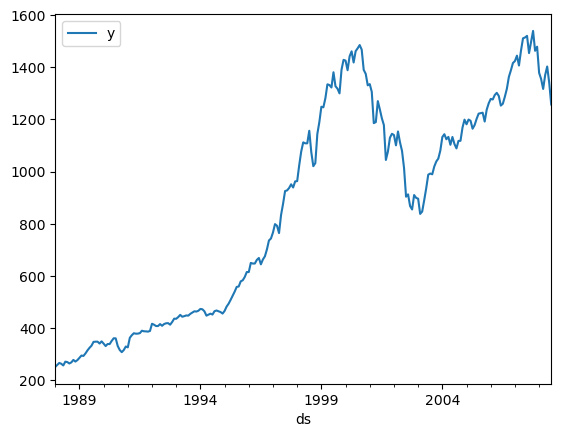

In [38]:
# Plot the data
monthly_average_katrina_actual.plot(x = 'ds', y = 'y')

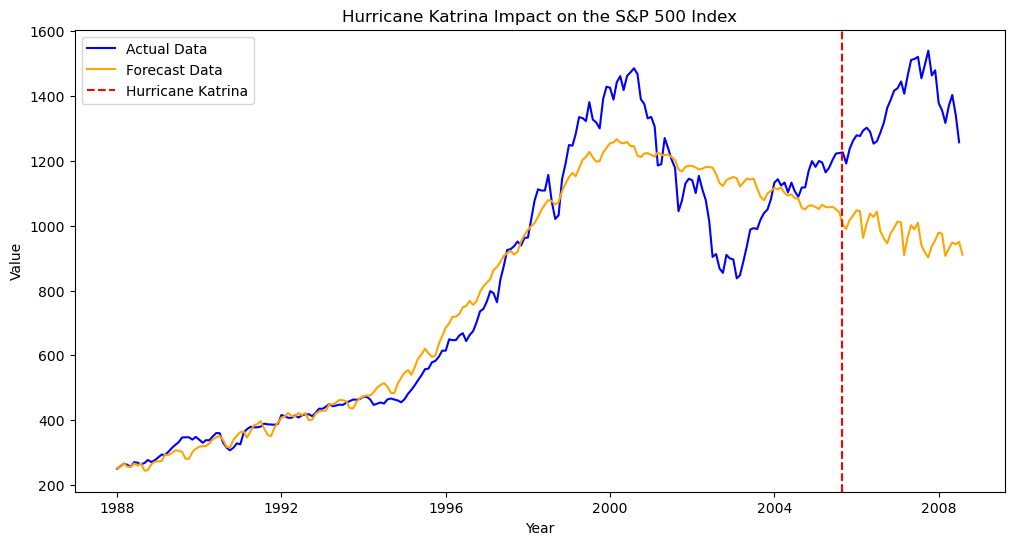

In [39]:
# Assuming 'actual_data' and 'forecast_data' are your DataFrames
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(monthly_average_katrina_actual['ds'],monthly_average_katrina_actual['y'], label='Actual Data', color='blue')

# Plot forecast data
plt.plot(future_katrina_SP.index,future_katrina_SP['yhat'], label='Forecast Data', color='orange')

# Mark the Katrina event
event_date = pd.to_datetime('2005-08-23')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina')

# Add titles and labels
plt.title('Hurricane Katrina Impact on the S&P 500 Index')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


In [40]:
# export monthly_average as csv
# export future_911_SP
# export future_katrina_SP as csv
monthly_average.to_csv('resources/S&P_cleaned')
future_911_SP.to_csv('resources/forecast_9_11_S&P')
future_katrina_SP.to_csv('resources/forecast_katrina_S&P')